<a href="https://colab.research.google.com/github/ShraddhaJadhav1103/Shraddha/blob/master/DV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('listeners.csv')
df.shape

(2500, 5)

In [ ]:
df.head()

,Artist,Listeners,Daily Trend,Peak,PkListeners
0,The Weeknd,"107,592,328","-138,880",1,"113,034,886"
1,Taylor Swift,"101,003,302",889,2,"101,003,302"
2,Ed Sheeran,"76,475,126","-68,137",2,"87,934,910"
3,Dua Lipa,"76,421,916","-71,356",4,"77,778,397"
4,Bad Bunny,"76,162,057","-199,052",3,"83,950,570"


In [ ]:
df.tail()

,Artist,Listeners,Daily Trend,Peak,PkListeners
2495,JosÃ© Luis Perales,"4,279,952","1,953",2291,"4,361,097"
2496,Olamide,"4,279,241",-415,2384,"4,301,258"
2497,Shalmali Kholgade,"4,277,053","6,831",1926,"4,717,659"
2498,La Receta,"4,276,935","-22,632",2405,"4,401,754"
2499,Violet Days,"4,274,633","-37,993",2029,"4,974,853"


In [ ]:
df.describe()

,Peak
count,2500.0000
mean,1061.2228
std,639.7277
min,1.0000
25%,516.0000
50%,1034.5000
75%,1582.2500
max,2493.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist       2500 non-null   object
 1   Listeners    2500 non-null   object
 2   Daily Trend  2500 non-null   object
 3   Peak         2500 non-null   int64 
 4   PkListeners  2500 non-null   object
dtypes: int64(1), object(4)
memory usage: 97.8+ KB


In [ ]:
df.nunique()

Artist         2500
Listeners      2486
Daily Trend    2469
Peak           1558
PkListeners    2492
dtype: int64

In [ ]:
df["Artist"].value_counts()

The Weeknd                    1
Bruno Martini                 1
Los AutÃ©nticos Decadentes    1
Sheck Wes                     1
Alle Farben                   1
                             ..
Riton                         1
TWICE                         1
Sidhu Moose Wala              1
The Fray                      1
Violet Days                   1
Name: Artist, Length: 2500, dtype: int64

In [ ]:
df.isnull().sum()

Artist         0
Listeners      0
Daily Trend    0
Peak           0
PkListeners    0
dtype: int64

In [ ]:
df.columns

Index(['Artist', 'Listeners', 'Daily Trend', 'Peak', 'PkListeners'], dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
def convert_columns_to_int(df, columns_to_convert):
    for col in columns_to_convert:
        if col in df.columns:
            df[col] = df[col].str.replace(',', '').astype(int)
        else:
            print(f"Column '{col}' not found in the DataFrame.")
    return df

columns_to_convert = ['Listeners', 'PkListeners','Daily Trend']
df = convert_columns_to_int(df, columns_to_convert)

# **Univariate Analysis:-**

In [ ]:
df['Artist'].value_counts().head(10)

The Weeknd                    1
Bruno Martini                 1
Los AutÃ©nticos Decadentes    1
Sheck Wes                     1
Alle Farben                   1
Westside Gunn                 1
Chris Young                   1
CRO                           1
Pesado                        1
Chase & Status                1
Name: Artist, dtype: int64

<Axes: ylabel='Artist'>

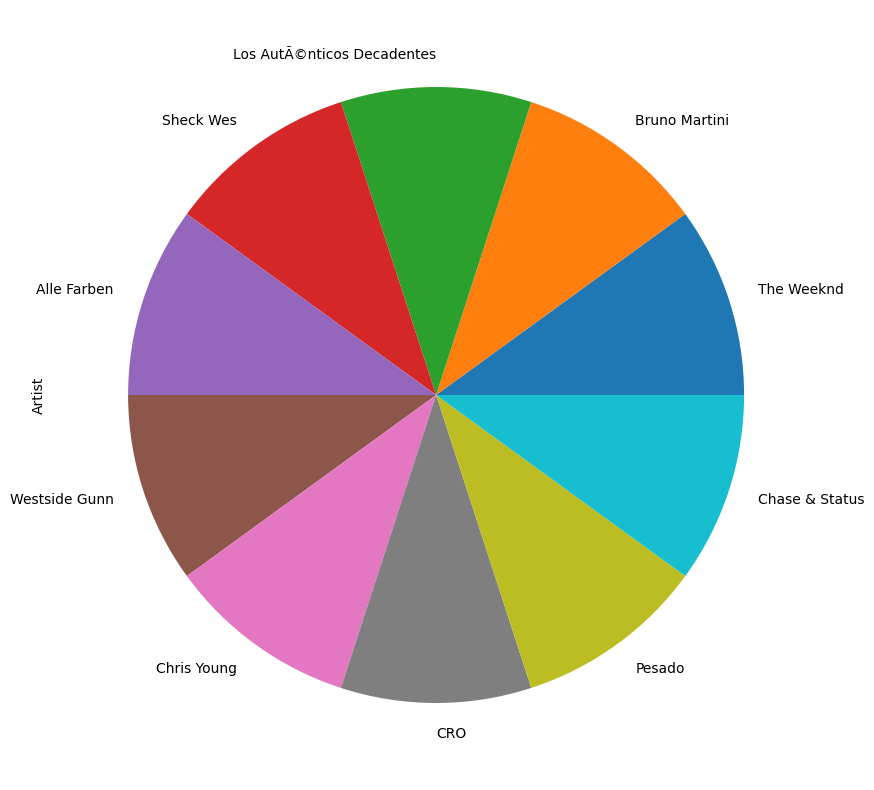

In [ ]:
plt.figure(figsize=(15,10))
df['Artist'].value_counts().head(10).plot.pie()

**Insights:-**

   The pie chart displays the distribution of the top 10 artists who have the most appearances in your dataset. Each slice of the pie represents one artist, and the size of each slice is proportional to the number of times that artist appears in the dataset.


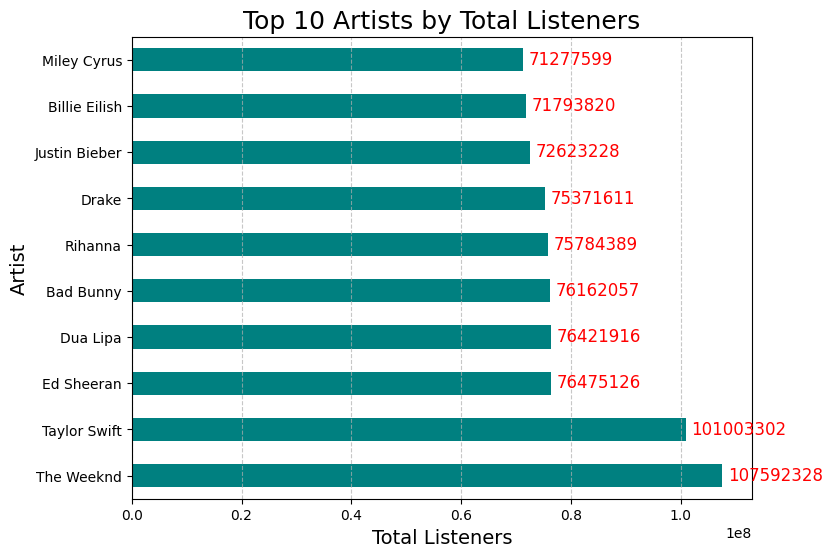

In [ ]:
top_artists = df.groupby('Artist')['Listeners'].sum().sort_values(ascending=False)[:10]
fig, ax = plt.subplots(figsize=(8, 6))
top_artists.plot(kind='barh', color='teal')
ax.set_title('Top 10 Artists by Total Listeners', fontsize=18)
ax.set_xlabel('Total Listeners', fontsize=14)
ax.set_ylabel('Artist', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.7)
for i, v in enumerate(top_artists):
    ax.text(v + 1000000, i - 0.1, str(v), color='red', fontsize=12)
plt.show()

**Insight:-**
1. **Top 10 Artists by Total Listeners**:
   - The horizontal bar chart presents the top 10 artists with the most cumulative listeners.
   - Each horizontal bar represents one artist, and the length of the bar corresponds to the total number of listeners for that artist.

2. **Comparison of Total Listener Counts**:
   - The chart allows for a quick visual comparison of listener counts among the top artists.
   - Artists with longer bars have higher total listener counts, while those with shorter bars have fewer listeners.

3. **Artist Popularity**:
   - This chart highlights which artists are the most popular or have the largest combined listener base among the top 10 artists.
   - It's useful for identifying the key performers in your dataset in terms of total listeners.

4. **Customization**:
   - The chart is customized with a title, axis labels, and grid lines to enhance readability.
   - Text annotations in red display the exact total listener counts for each artist to provide precise information.

Overall, this visualization provides a clear and concise summary of the top-performing artists in terms of total listener counts, making it easy to identify the most popular artists within your dataset.

count    2.500000e+03
mean     1.111836e+07
std      1.022231e+07
min      4.274633e+06
25%      5.400151e+06
50%      7.463490e+06
75%      1.203113e+07
max      1.075923e+08
Name: Listeners, dtype: float64


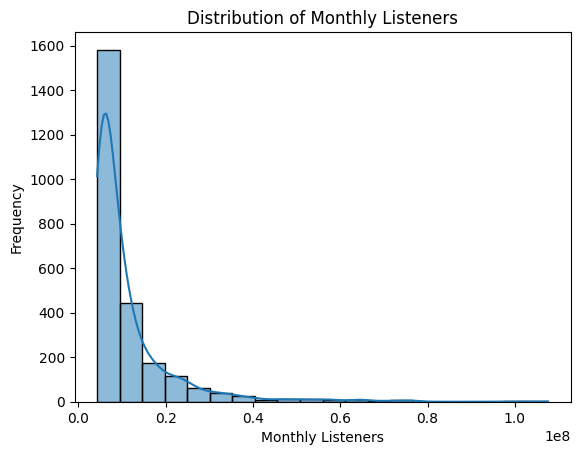

In [ ]:
listeners_column = 'Listeners'
print(df[listeners_column].describe())
sns.histplot(df[listeners_column], bins=20, kde=True)
plt.xlabel('Monthly Listeners')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Listeners')
plt.show()

   **Insight:-**
   - The shape of the histogram provides insights into the distribution of monthly listeners. Is it roughly symmetric, positively skewed, or negatively skewed?
   - The number of peaks or modes in the histogram indicates whether there are multiple subgroups or patterns in the data.
   - The KDE curve (if enabled) provides a smoothed estimate of the data's underlying distribution.


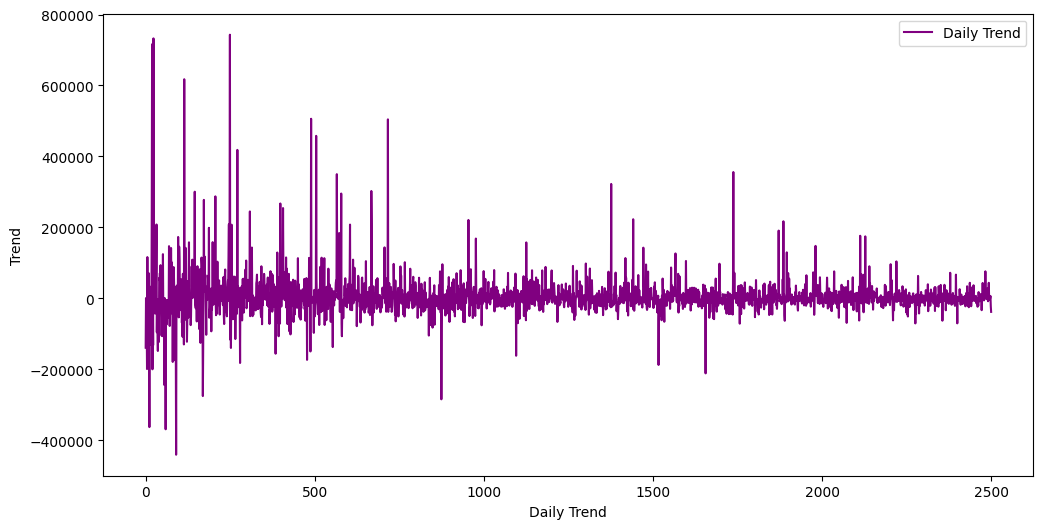

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Daily Trend'],color='purple', label='Daily Trend')
plt.xlabel('Daily Trend')
plt.ylabel('Trend')
plt.legend()
plt.show()

**Insight:-**

The line plot visualizes the "Daily Trend" variable over a range of values.  This plot provides a straightforward visualization of the trend in the "Daily Trend" variable, helping to observe patterns or fluctuations in the data.

# **Bivariate Analysis:-**

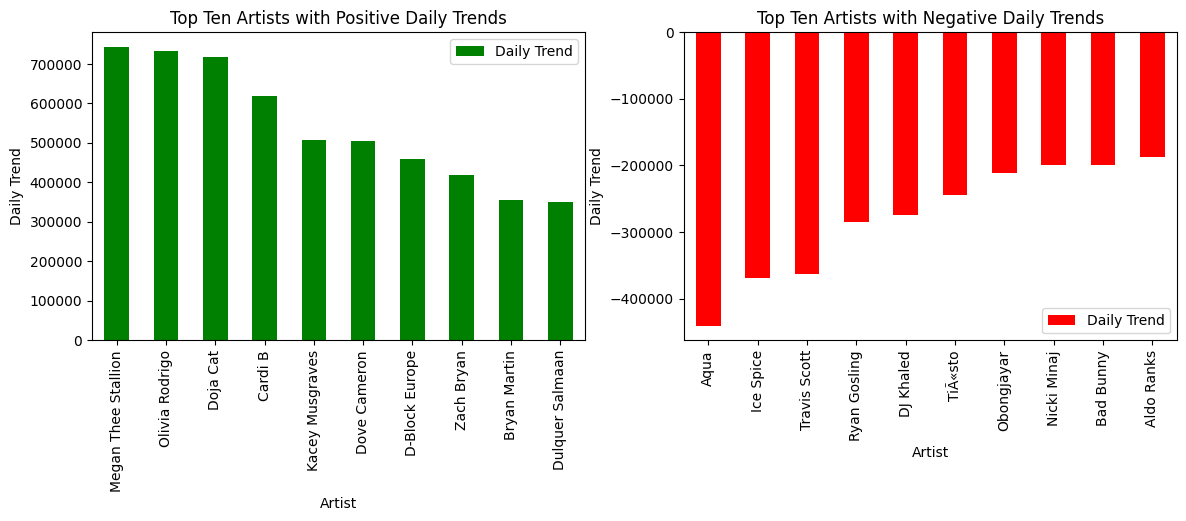

In [ ]:
positive_trend = df[df['Daily Trend'] > 0]
negative_trend = df[df['Daily Trend'] < 0]
top_positive = positive_trend.nlargest(10, 'Daily Trend')
top_negative = negative_trend.nsmallest(10, 'Daily Trend')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4))

top_positive.plot(kind='bar', x='Artist', y='Daily Trend', ax=ax1, color='green')
ax1.set_xlabel('Artist')
ax1.set_ylabel('Daily Trend')
ax1.set_title('Top Ten Artists with Positive Daily Trends')

top_negative.plot(kind='bar', x='Artist', y='Daily Trend', ax=ax2, color='red')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Daily Trend')
ax2.set_title('Top Ten Artists with Negative Daily Trends')
plt.show()

**Insight:-**

*   Positive Values: A positive value in the "Daily Trend" column indicates that
the artist's listenership has increased on that specific day. In other words, they gained more listeners on that day compared to the previous day.
*   Negative Values: Conversely, a negative value in the "Daily Trend" column suggests that the artist's listenership has decreased on that day. They lost listeners on that day compared to the previous day.


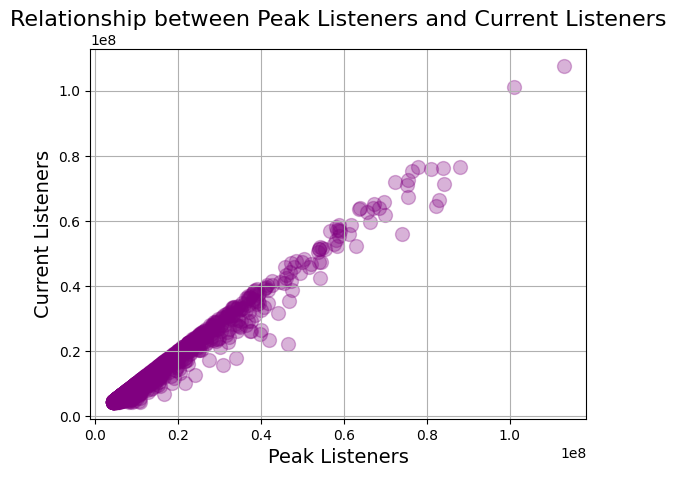

In [ ]:
plt.scatter(df['PkListeners'], df['Listeners'], color='purple', alpha=0.3, s=100)
plt.xlabel('Peak Listeners', fontsize=14)
plt.ylabel('Current Listeners', fontsize=14)
plt.title('Relationship between Peak Listeners and Current Listeners', fontsize=16)
plt.grid(True)
plt.show()

**Insight:-**

The scatter plot visualizes the relationship between "Peak Listeners" and "Current Listeners." It helps assess whether there is a correlation between these two variables. Points forming an upward-sloping pattern indicate a positive correlation, while a downward-sloping pattern suggests a negative correlation. The transparency and marker size enhance visibility, and grid lines aid in reading values.

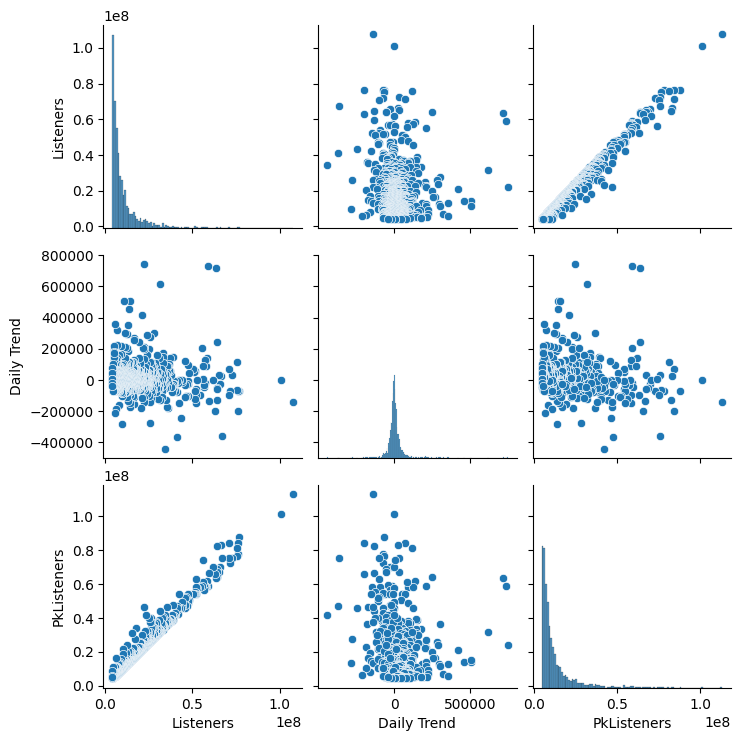

In [ ]:
sns.pairplot(df[['Listeners', 'Daily Trend', 'PkListeners']])

**Insight:-**


- **Pairwise Visualization**: The pairplot creates a grid of scatter plots, where each variable is compared to every other variable. In this case, it's examining the relationships between "Listeners," "Daily Trend," and "PkListeners."

- **Scatter Plots**: The diagonal of the matrix displays histograms for each individual variable, showing their distributions. The off-diagonal cells show scatter plots comparing pairs of variables.

- **Correlation Assessment**: By examining the scatter plots, you can visually assess the relationships between these variables. Look for patterns, trends, or clusters of points. For example:
  - Positive correlations might be indicated by points sloping upwards from left to right.
  - Negative correlations might show points sloping downwards.
  - No strong correlations would be reflected in scattered or dispersed points.

- **Distribution Overview**: The histograms on the diagonal help understand the distribution of each variable in isolation.

- **Data Exploration**: Pairplots are useful for initial data exploration and identifying potential relationships or trends between variables.

In summary, the pairplot provides a visual overview of how "Listeners," "Daily Trend," and "PkListeners" relate to each other in your dataset. It's a valuable tool for identifying patterns and potential correlations among these numerical variables.

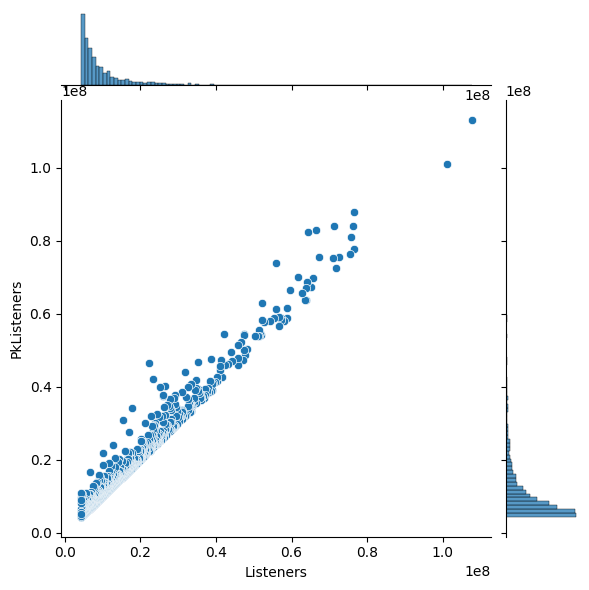

In [ ]:
x_variable = "Listeners"
y_variable = "PkListeners"
sns.jointplot(data=df, x=x_variable, y=y_variable, kind="scatter")
plt.show()

**Insight:-**

The joint plot generated by the code visualizes the bivariate relationship between "Listeners" (x-axis) and "PkListeners" (y-axis) using a scatter plot with marginal histograms.
- **Scatter Plot**: The central part of the plot consists of a scatter plot. Each point on the scatter plot represents an artist in your dataset. The x-coordinate of each point corresponds to the number of "Listeners," and the y-coordinate corresponds to the number of "PkListeners."
- **Relationship Assessment**: By examining the scatter plot, you can assess the relationship between these two numerical variables. Specifically:
  - **Positive Trend**: If the points generally follow an upward-sloping pattern from left to right, it suggests a positive correlation. This means that as "Listeners" increase, "PkListeners" tend to increase as well.
  - **Negative Trend**: If the points generally follow a downward-sloping pattern from left to right, it suggests a negative correlation, meaning that as "Listeners" increase, "PkListeners" tend to decrease.
  - **No Clear Trend**: If the points appear scattered without a clear pattern, it suggests no strong linear correlation between the two variables.

- **Marginal Histograms**: The histograms along the top and right sides of the plot display the distributions of "Listeners" and "PkListeners" individually. They provide insights into the frequency and spread of each variable.

In summary, the joint plot provides a visual summary of how "Listeners" and "PkListeners" relate to each other, helping you understand the nature of their relationship and distribution in your dataset.

<ipython-input-95-030fbd61d631>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_ten['Artist'], rotation=45, ha='right')


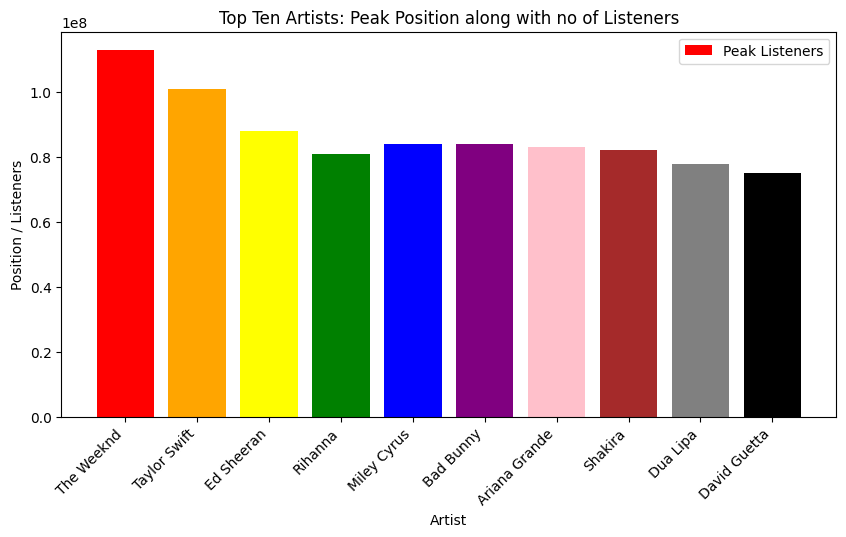

In [ ]:
top_ten = df.nsmallest(10, 'Peak')
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'black']
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(top_ten['Artist'], top_ten['PkListeners'], color=colors, label='Peak Listeners')
ax.set_xlabel('Artist')
ax.set_xticklabels(top_ten['Artist'], rotation=45, ha='right')
ax.set_ylabel('Position / Listeners')
ax.set_title('Top Ten Artists: Peak Position along with no of Listeners')
ax.legend()
plt.show()

**Insight:-**

This visualization allows you to quickly identify the top artists who achieved the highest chart positions and the number of listeners they had at their peak. The combination of peak position and listeners in the same plot provides valuable insights into artist popularity and performance on the charts.

# **Multivariate Analysis:-**

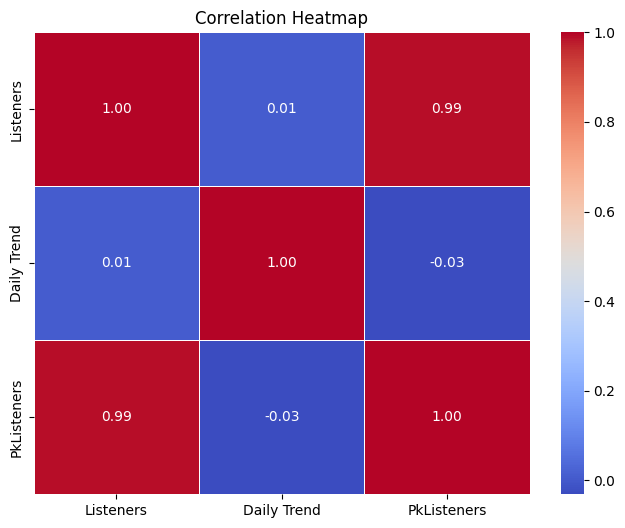

In [ ]:
numerical_columns = ["Listeners", "Daily Trend", "PkListeners"]
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


 **Insights**:-

  By examining the heatmap, you can identify which pairs of variables have strong, weak, or no correlations. This information helps you understand how "Listeners," "Daily Trend," and "PkListeners" relate to each other. For example, if two variables have a strong positive correlation, changes in one tend to be associated with similar changes in the other.
 This correlation heatmap provides a visual summary of the relationships among the selected numerical variables, allowing you to assess their interdependencies and patterns.